<a href="https://colab.research.google.com/github/EugeneWoo/heart_disease_pred_app/blob/main/heart_disease_RFmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd, numpy as np
!pip install -q streamlit
import streamlit as st
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.2 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [3]:
df = pd.read_csv('heart.csv')
df.describe()


,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [4]:
print(df.head())

   age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0


In [5]:
X = df.drop('heart disease',axis=1)
# Putting response variable to y
y = df['heart disease']

In [6]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [7]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
# %%time
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [8]:
# checking the oob score
classifier_rf.oob_score_

0.656084656084656

In [9]:
classifier_rf.score(X_train, y_train)

0.8835978835978836

In [10]:
classifier_rf.score(X_test, y_test)

0.654320987654321

In [11]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# %%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [12]:
grid_search.best_score_


0.6985815602836879

In [13]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

In [17]:
# testing model on array of single user input
input_arr = np.empty((1,4))

age=70
sex=0
BP=210
cholestrol=350
input_arr = np.array([age,sex,BP,cholestrol],ndmin=2)
print(input_arr)

[[ 70   0 210 350]]


In [18]:
prediction = rf_best.predict(input_arr)[0]

def hd_predict(prediction):
    if prediction == 0:
        hd_pred = 'not suffering from any heart disease.'
        pred_prob = rf_best.predict_proba(input_arr)[0][prediction]
    else:
        hd_pred = 'suffering from heart disease in future.'
        pred_prob = round(rf_best.predict_proba(input_arr)[0][prediction],2)*100
    return(hd_pred,pred_prob)

print("You have a",hd_predict(prediction)[1],"% probability of",hd_predict(prediction)[0],end="")

You have a 52.0 % probability of suffering from heart disease in future.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [19]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,age,0.461285
1,sex,0.218085
3,cholestrol,0.188884
2,BP,0.131746


In [20]:
# Export model to joblib for ease of reproduceability during app deployment
!pip install joblib
import joblib as jl
jl.dump(rf_best, 'randomforest_heartdisease.joblib')

['randomforest_heartdisease.joblib']

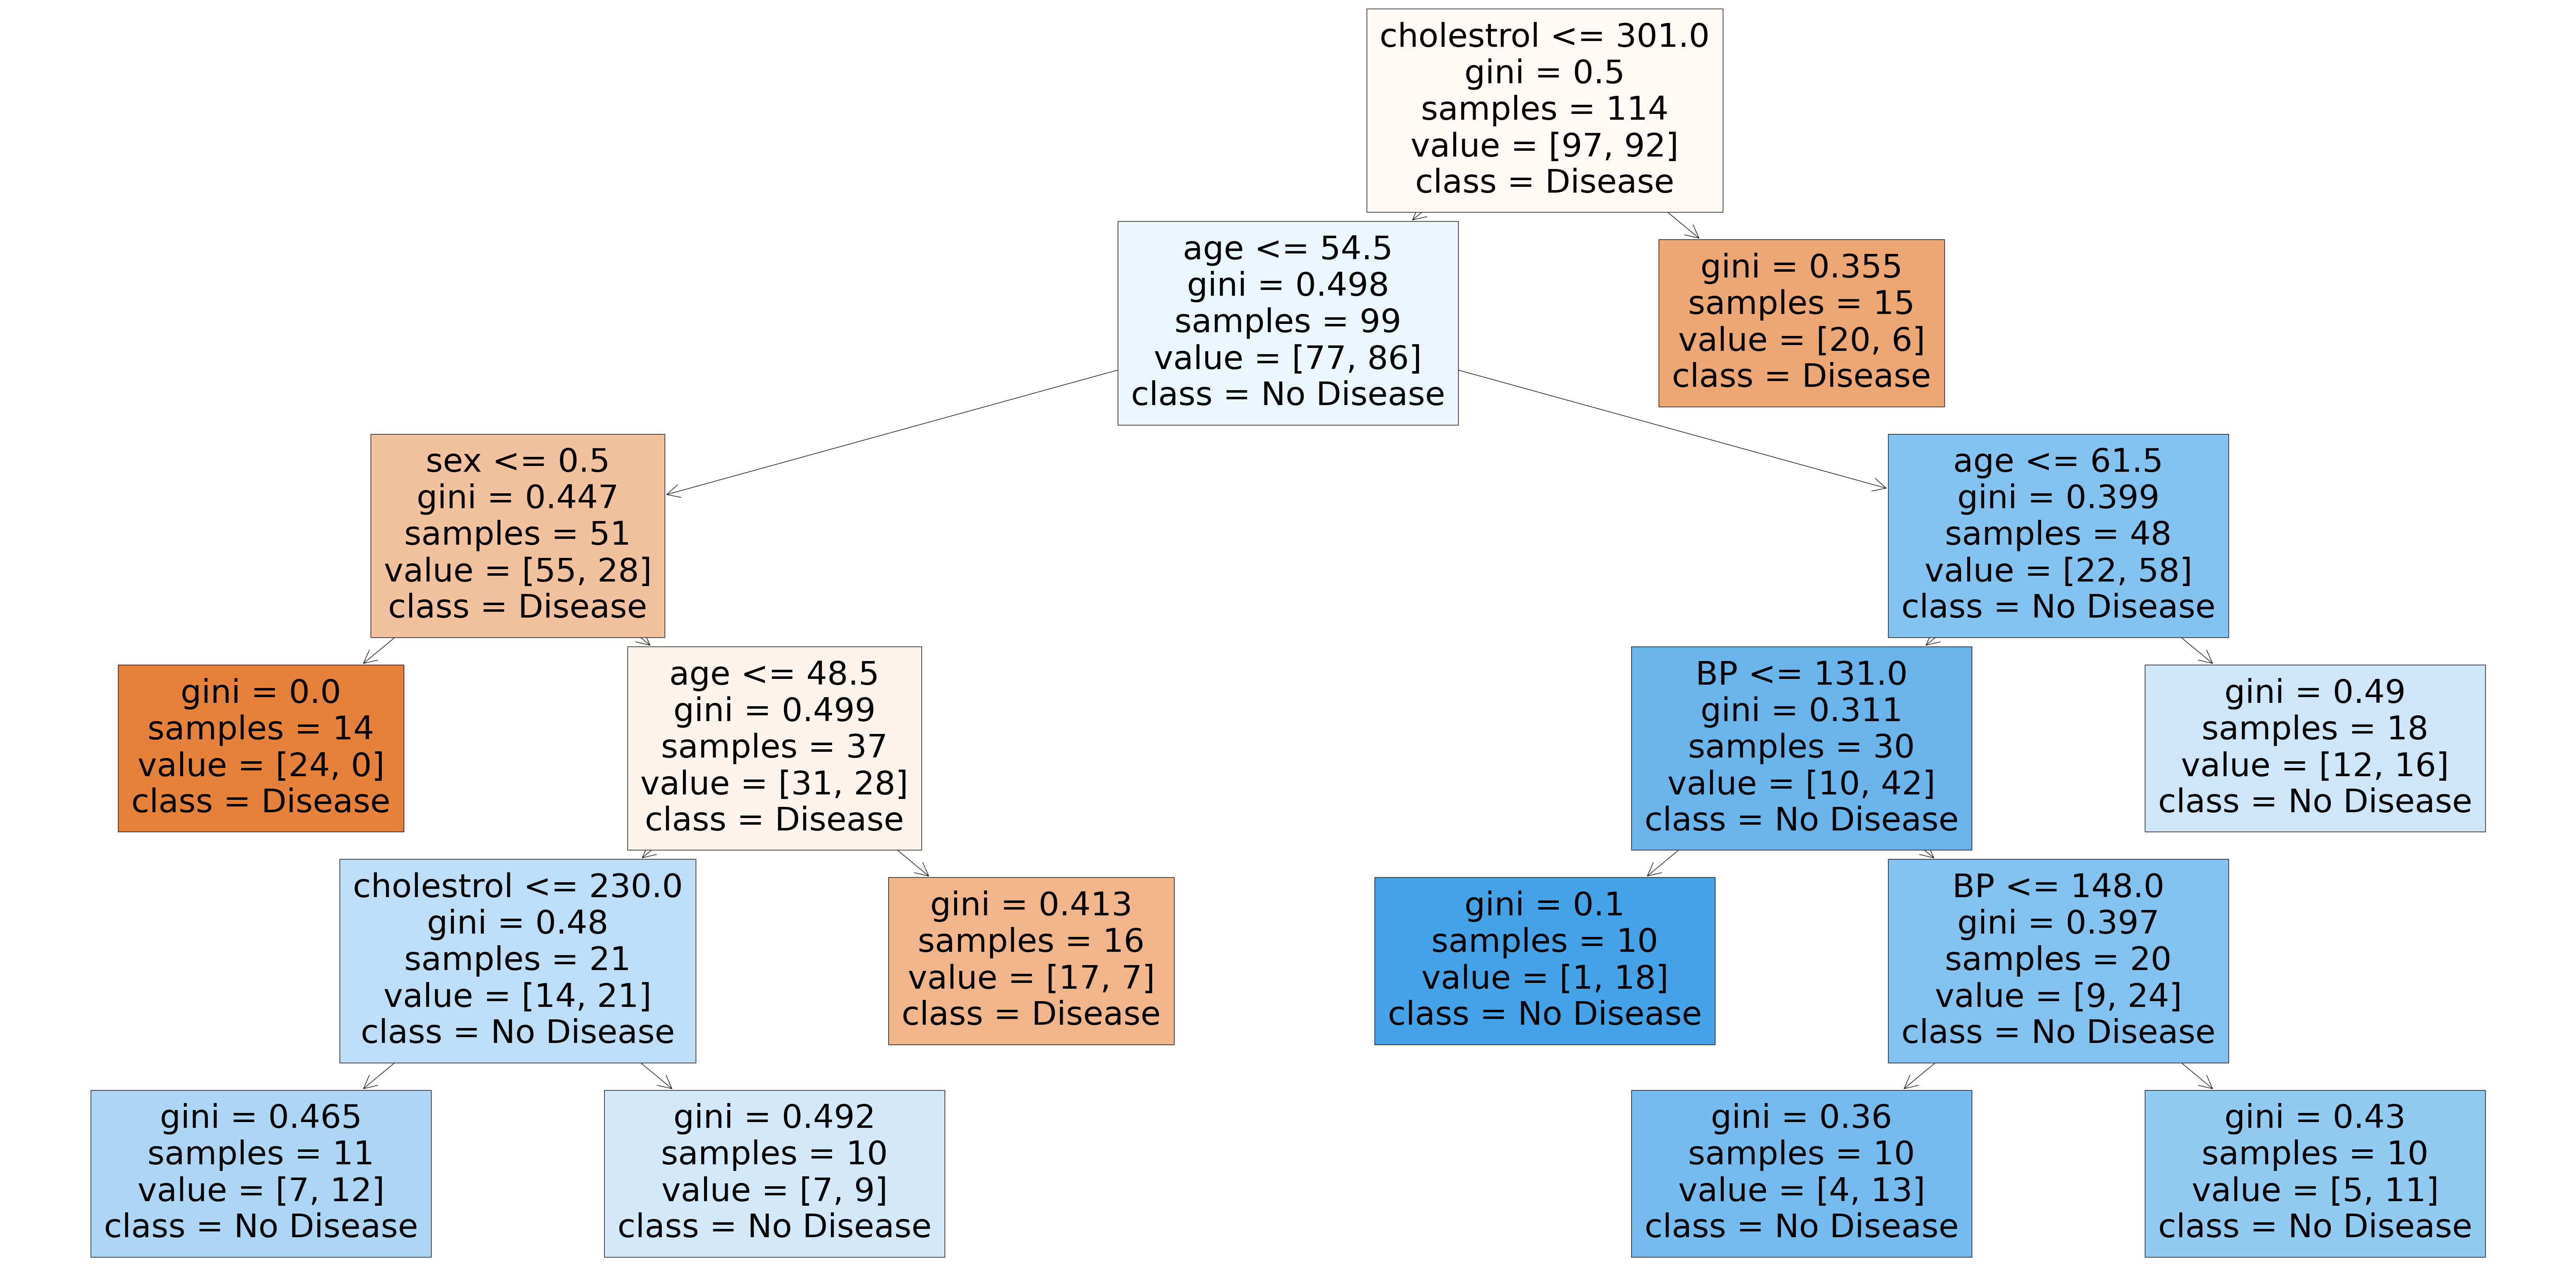

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

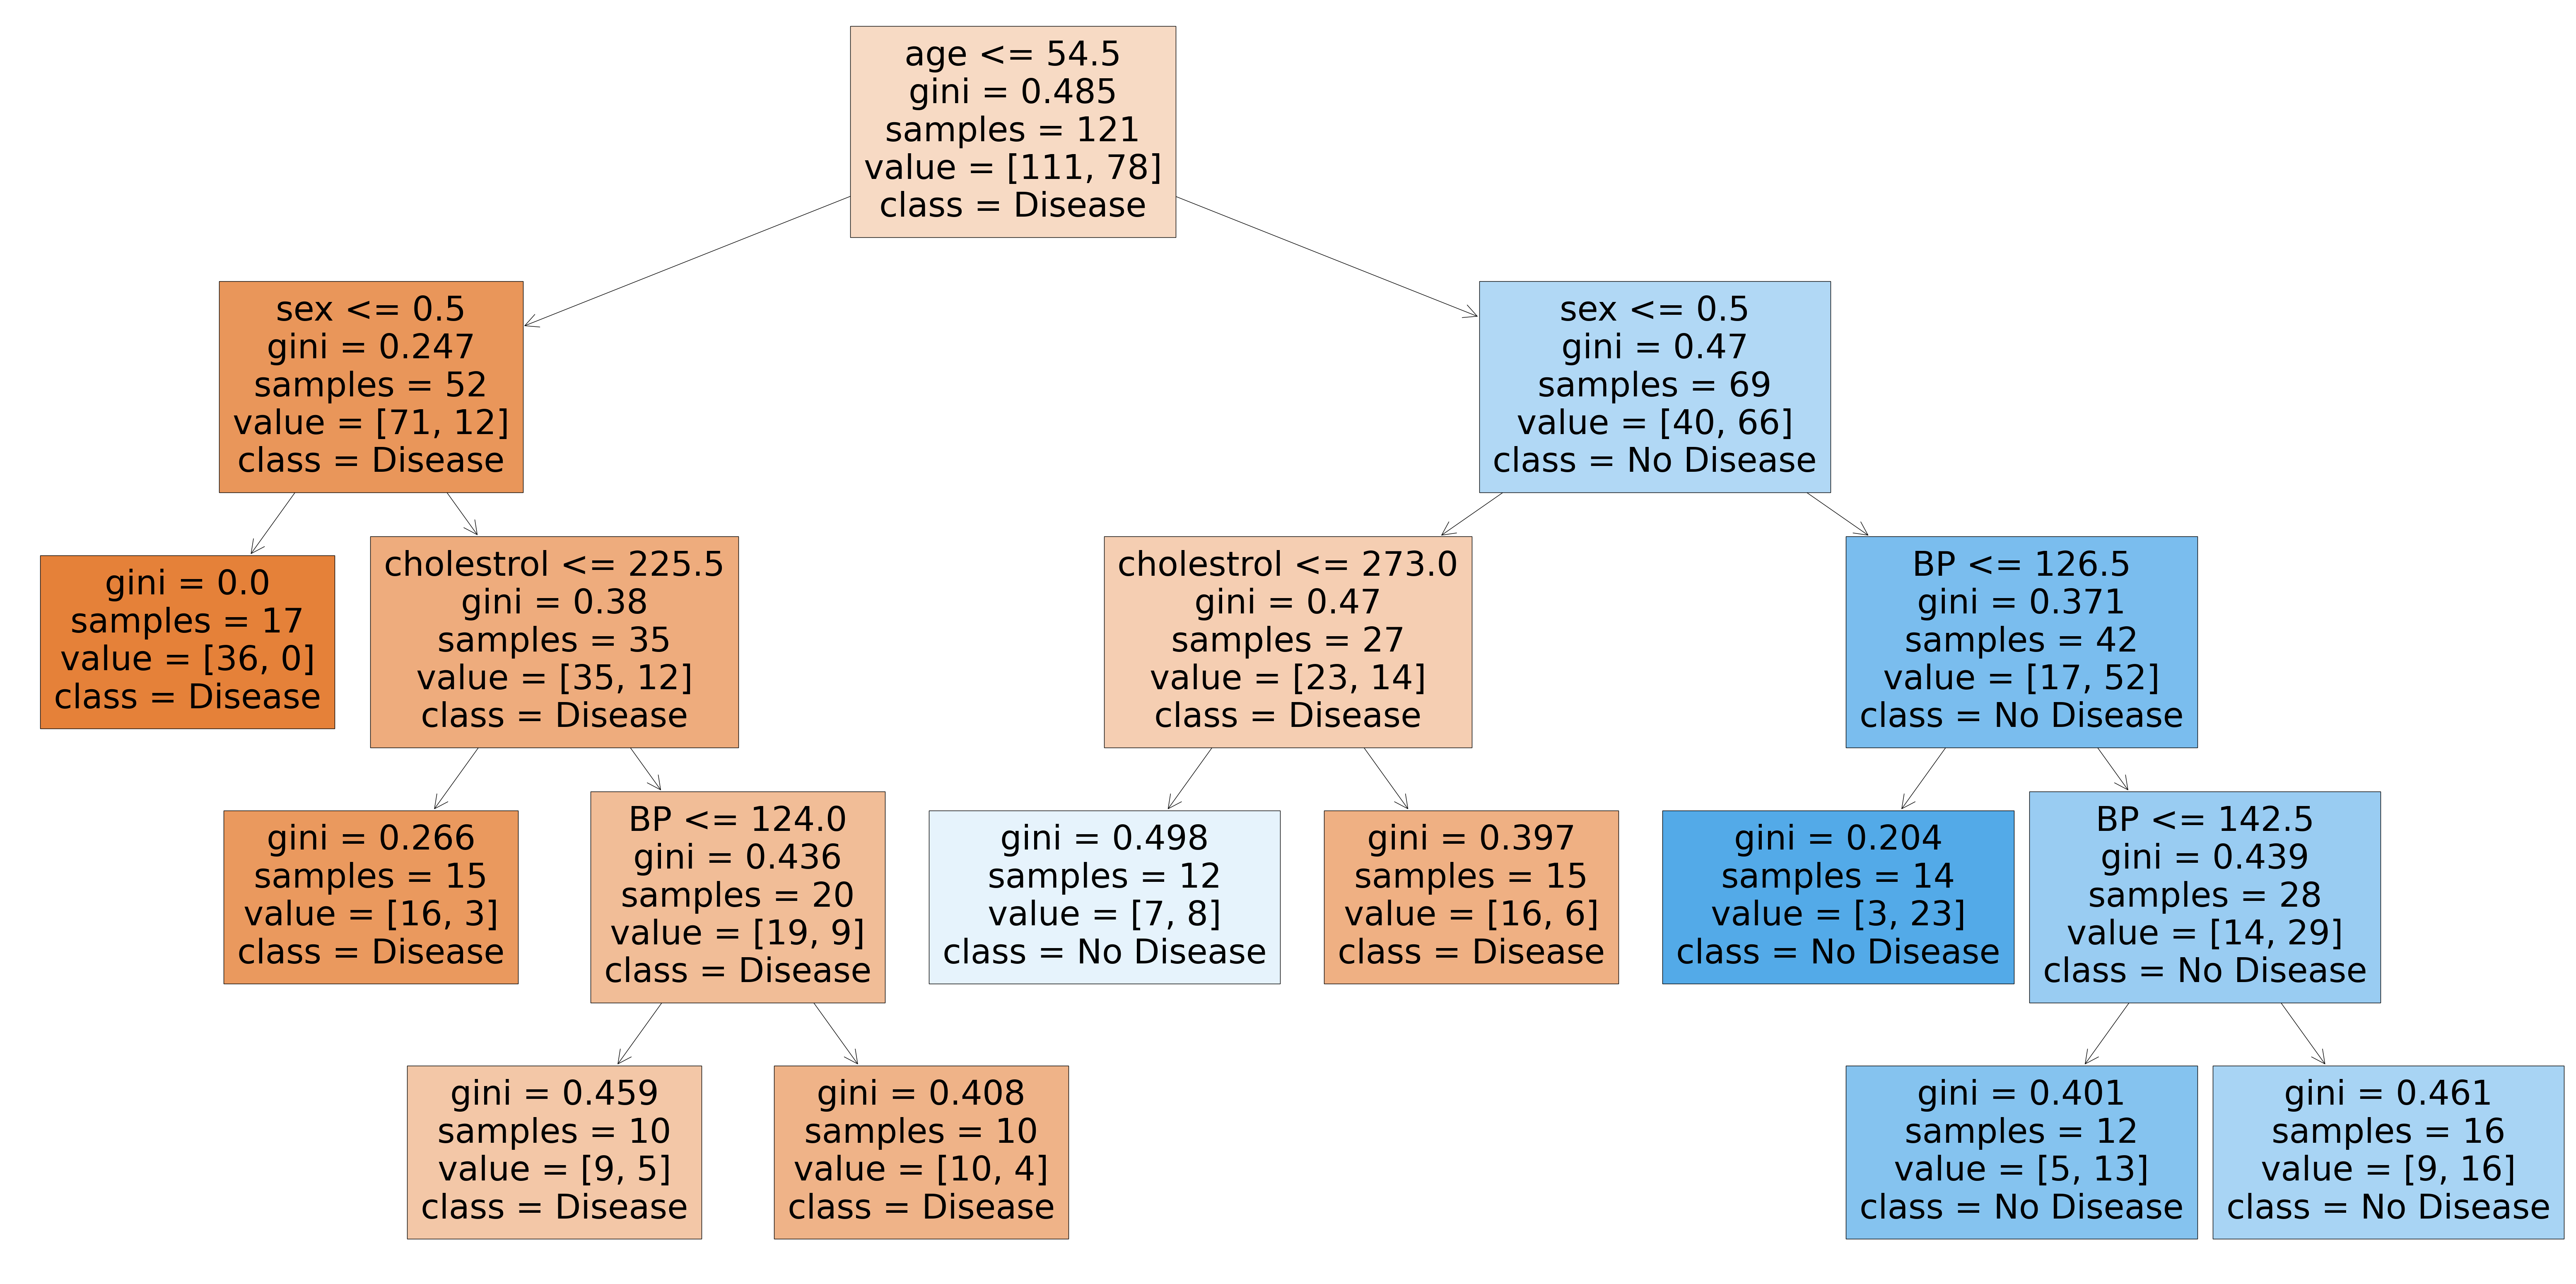

In [22]:
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[8], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);